In [1]:
## Options
import pandas as pd
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 500)

%load_ext autoreload
%autoreload 2

## Data Loading
filePath = 'data/Giedt kbtu_fans.xlsx'
data = pd.read_excel(filePath, header=0, index_col=0, parse_date=True)
print(data.columns)

Index([u'Giedt_ChilledWater_Demand_kBtu', u'Giedt_Electricity_Demand_kBtu', u'Giedt_Steam_Demand_kBtu'], dtype='object')


In [2]:
## Imports

## Mac imports
#import sys
#toolPath = r'C:\Users\koshnick\Box\UCD_ECO_coding\Correy M&V'
#sys.path.append(toolPath)

## Main Imports
import mnv11 as mnv
print(mnv.version)
import matplotlib.pyplot as plt
print("Success!")

Version 1.1
Success!


# Data Section

Q(75%): 46.65 Q(25%): 26.46
IQR value is 20.19
Ceiling adjusted by IQR - Now 127.41


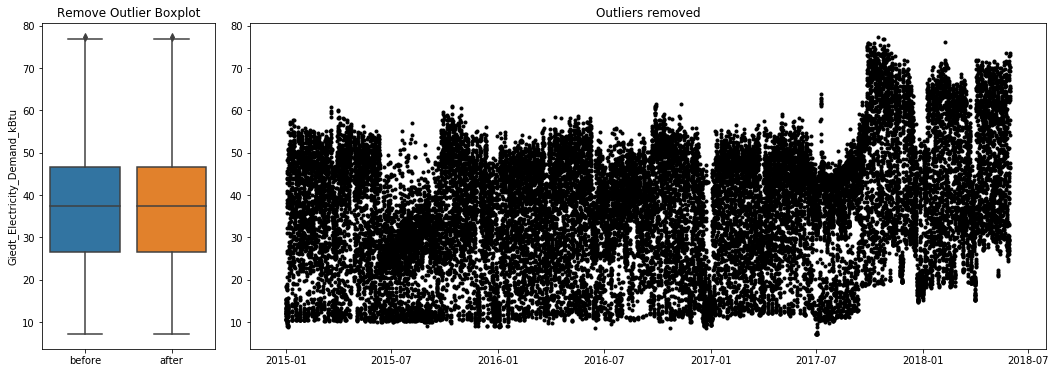

In [3]:
inputDict = {'IQRmult' : 4.0,
                 'IQR' : 'y',
                 'resampleRate' : 'D',
                 'verbosity' : 3,
                 'sliceType' : 'ranges', #half, middate, ranges
                 'midDate' : '2017-01-01', #only needed with sliceType : 'middate'
                 'dateRanges' : ['2015-01-01','2017-07-15','2017-08-15','2018-04-01'],
                 'OATname' : None,
                 'OATsource' : 'file'} #only needed with sliceType : 'ranges'}

dc = mnv.data_handler(data[data.columns[1]], inputDict)
dc.default_clean()

## Run the next line incase the y-range is FUBAR
#dc._outlier_plot(dc.modifiedData[dc.com], yrange=(-100,dc.modifiedData[dc.com].max()*1.1)) 

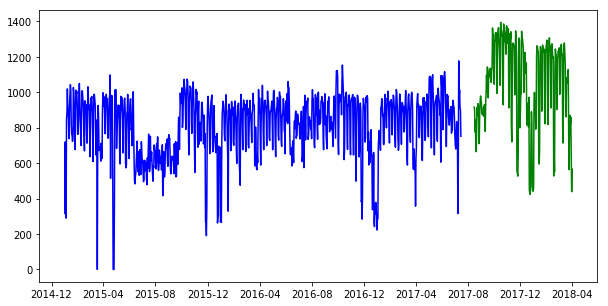

In [4]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(dc.pre[dc.com],color='b')
ax.plot(dc.post[dc.com],color='g')
plt.show()

# Many Linear Models

        AIC       AR2        R2      MSE postDiff                               params                                            summary
14  9493.26  0.309136  0.321273  21053.6 -56038.3         HDH2 + C(month) + C(weekend)                                    OLS Regressi...
0   9494.66  0.308741  0.321819  21065.6 -56129.2  CDH2 + HDH2 + C(month) + C(weekend)                                    OLS Regressi...
23  9494.69  0.308713  0.321792  21066.5   -56049   CDH + HDH2 + C(month) + C(weekend)                                    OLS Regressi...
20  9505.14  0.297975  0.310307  21393.7 -56601.8          HDH + C(month) + C(weekend)                                    OLS Regressi...
10  9505.16  0.298879  0.312143  21366.2 -56701.3    CDH + HDH + C(month) + C(weekend)                                    OLS Regressi...


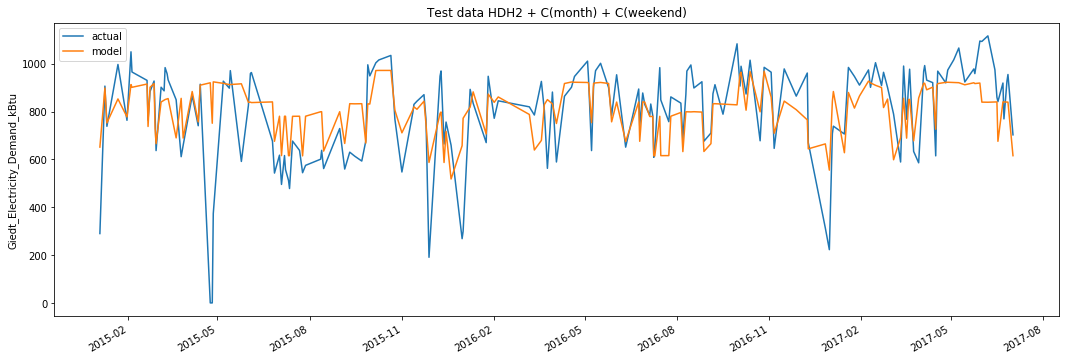

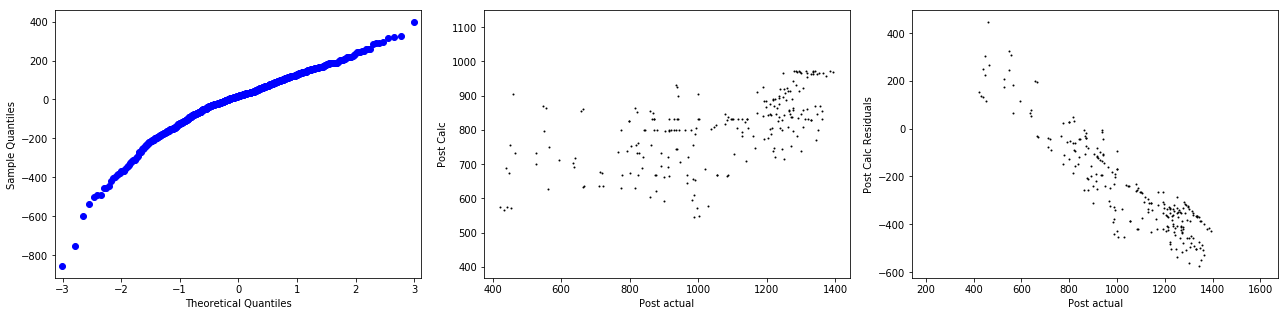

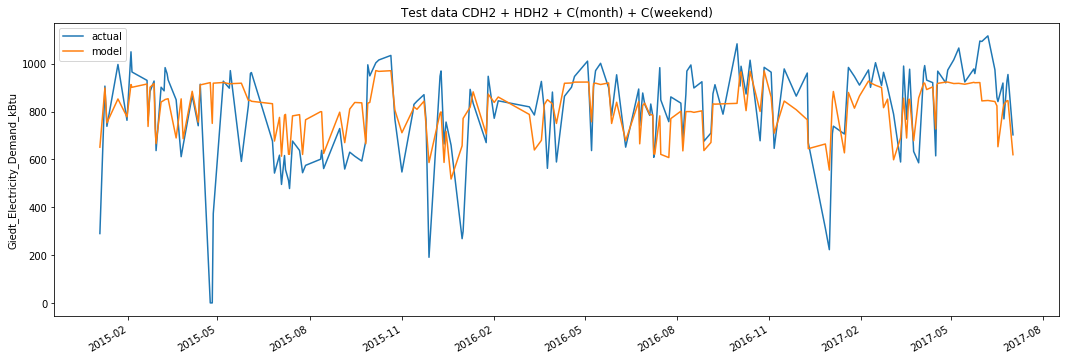

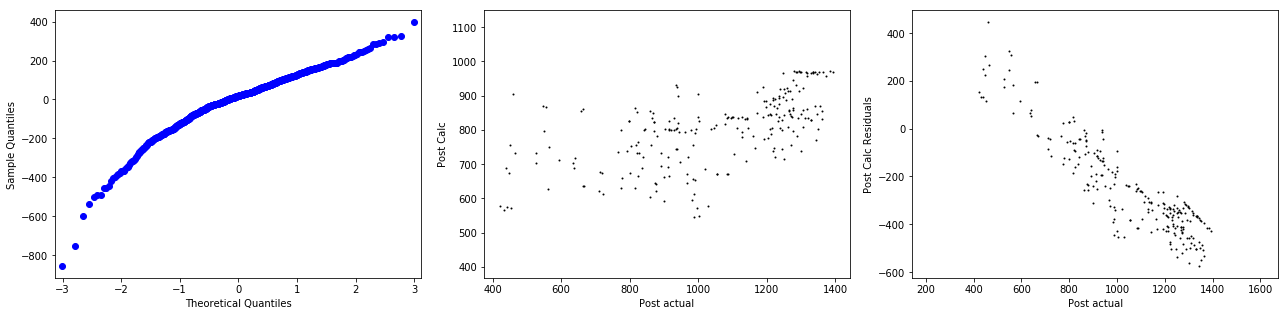

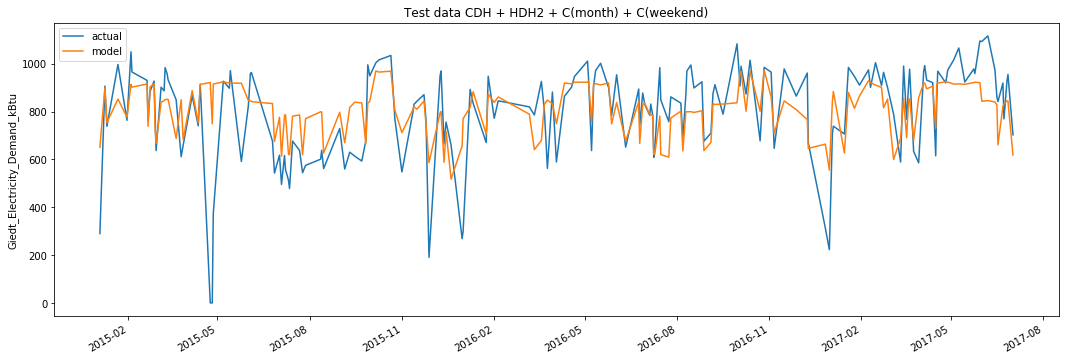

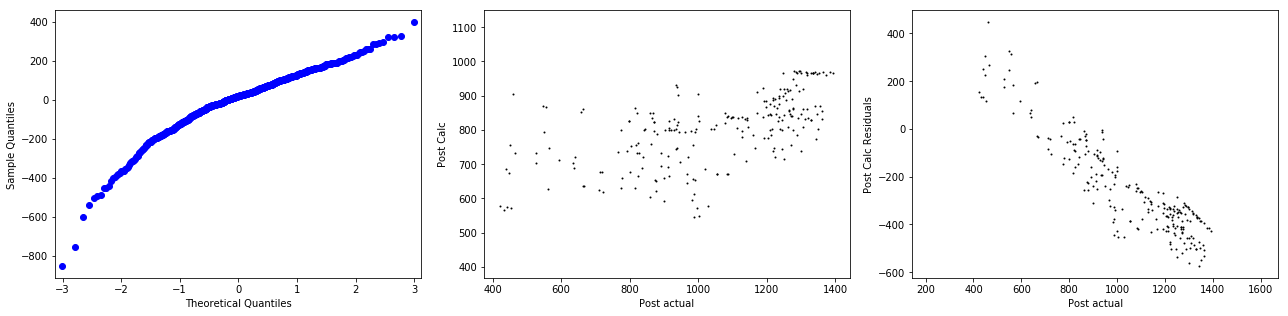

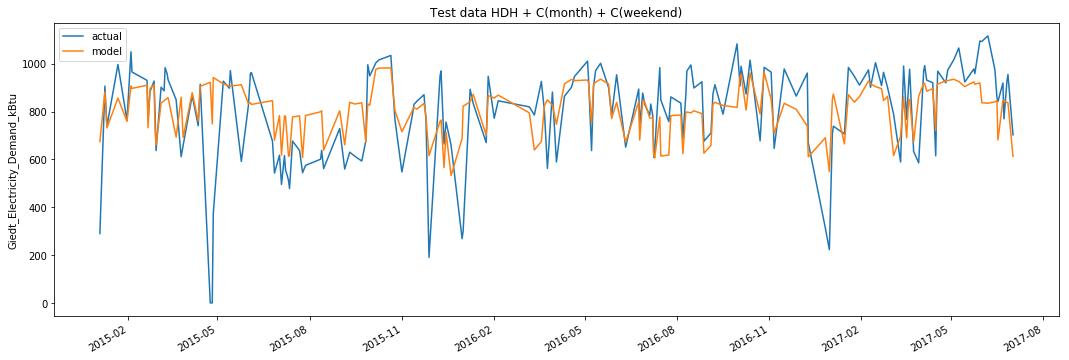

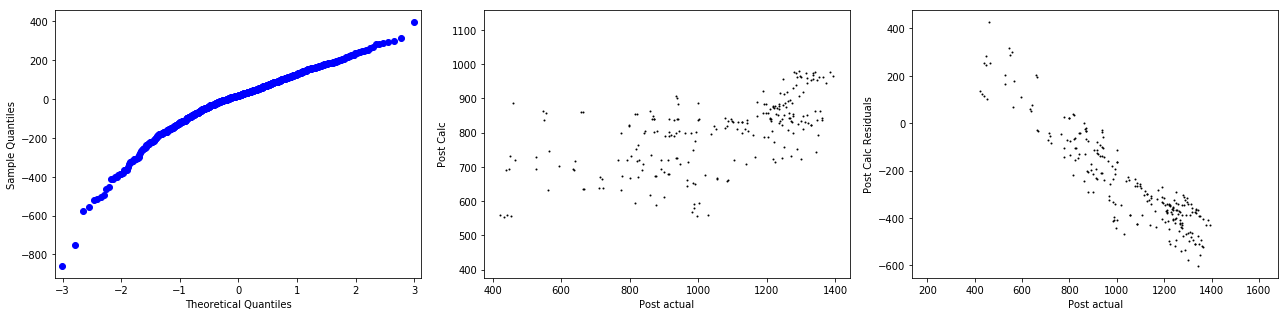

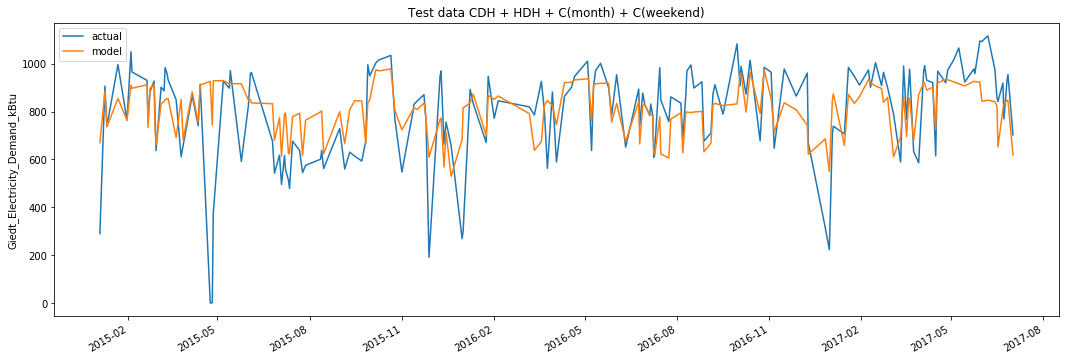

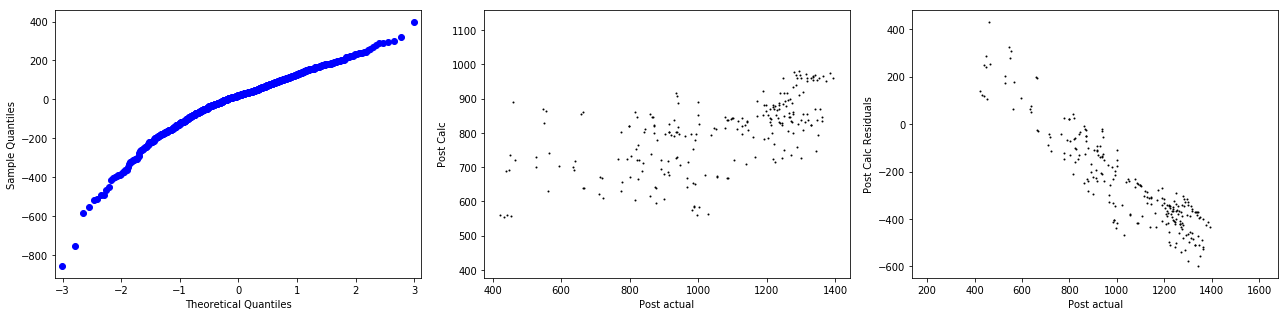

In [5]:
inputDict = {}

allmod = mnv.many_ols(dc.pre, dc.post, inputParams=['', 'C(month)','C(weekend)'])

allmod.run_all_linear()
print(allmod.statsPool[0:5])
allmod.plot_pool(5)
topParams = allmod.statsPool.iloc[0]['params']

# Single Linear Model

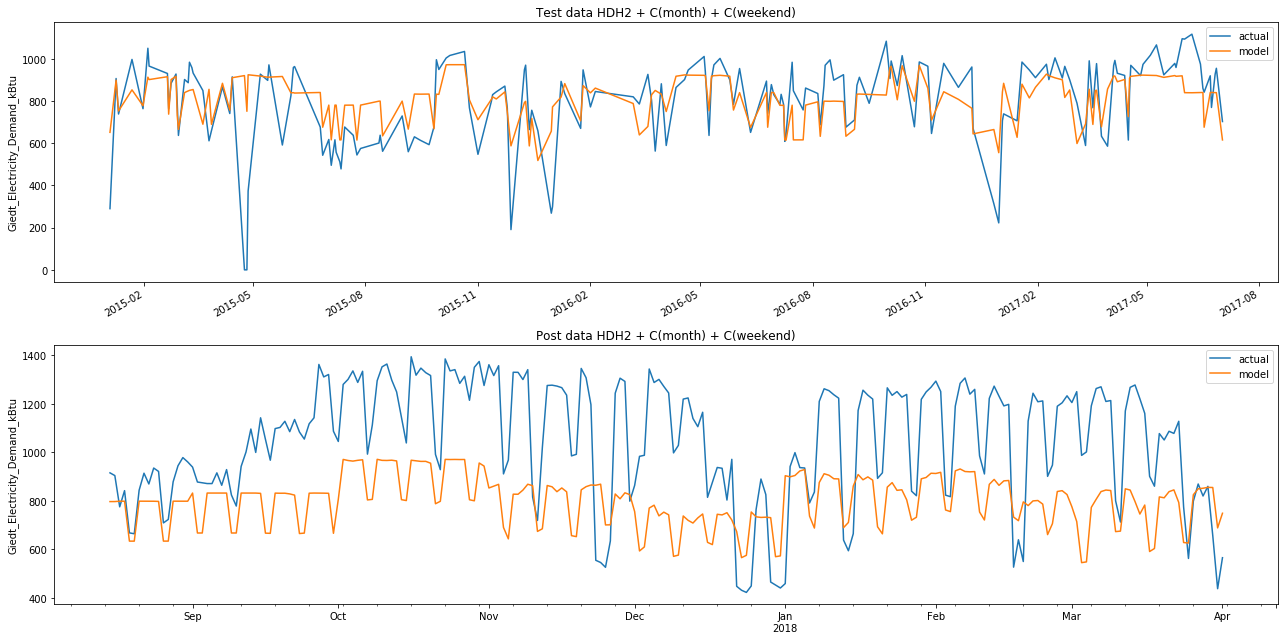

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Giedt_Electricity_Demand_kBtu   R-squared:                       0.321
Model:                                       OLS   Adj. R-squared:                  0.309
Method:                            Least Squares   F-statistic:                     26.47
Date:                           Fri, 08 Jun 2018   Prob (F-statistic):           5.86e-53
Time:                                   16:00:57   Log-Likelihood:                -4732.6
No. Observations:                            741   AIC:                             9493.
Df Residuals:                                727   BIC:                             9558.
Df Model:                                     13                                         
Covariance Type:                       nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          951.7891     24.788     38.397      0.000     903.124    1000.455
C(month)[T.2L]     -17.9600     26.329     -0.682      0.495     -69.651      33.731
C(month)[T.3L]     -93.7027     27.961     -3.351      0.001    -148.598     -38.808
C(month)[T.4L]     -27.8650     28.684     -0.971      0.332     -84.179      28.449
C(month)[T.5L]     -30.3177     29.182     -1.039      0.299     -87.608      26.973
C(month)[T.6L]    -111.7045     29.949     -3.730      0.000    -170.501     -52.908
C(month)[T.7L]    -171.4999     31.183     -5.500      0.000    -232.720    -110.280
C(month)[T.8L]    -152.6245     31.986     -4.772      0.000    -215.421     -89.828
C(month)[T.9L]    -119.1626     32.192     -3.702      0.000    -182.363     -55.962
C(month)[T.10L]     19.9213     31.406      0.634      0.526     -41.736      81.578
C(month)[T.11L]    -75.1046     27.670     -2.714      0.007    -129.428     -20.781
C(month)[T.12L]   -127.4809     26.591     -4.794      0.000    -179.686     -75.276
C(weekend)[T.1L]  -164.6164     11.794    -13.958      0.000    -187.771    -141.462
HDH2                -0.0007      0.000     -4.690      0.000      -0.001      -0.000
==============================================================================
Omnibus:                      184.429   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              562.170
Skew:                          -1.202   Prob(JB):                    8.44e-123
Kurtosis:                       6.525   Cond. No.                     1.09e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
params = topParams

mod = mnv.ols_model(dc.pre, dc.post, params)
mod.model_plot()

plt.show() # Show plot before Stats summary
mod.Fit.summary()

### Savings

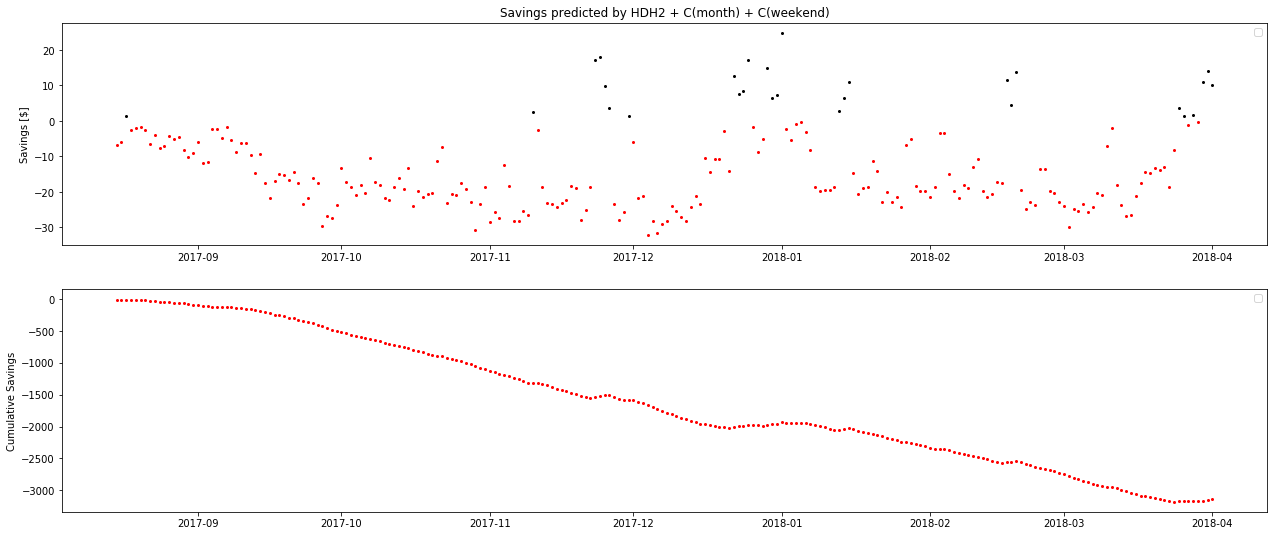

-3138.147185036329


In [7]:
rates = {'chw':0.056, 'steam':0.0157, 'elec':0.030} #kBTU prices for 2016(?)
commodity = 'chw'

mod.savings_plot(yaxis='dollars', rate=rates[commodity])
print(mod.postCumsum * rates[commodity])